Extract=  56.596275225592635 XAE=  0.3970345586886078 XBE=  0.5574430868438182
Raffinate=  75.40372477440737 XAR=  0.12637734900892017 XBR=  0.005978453129895502


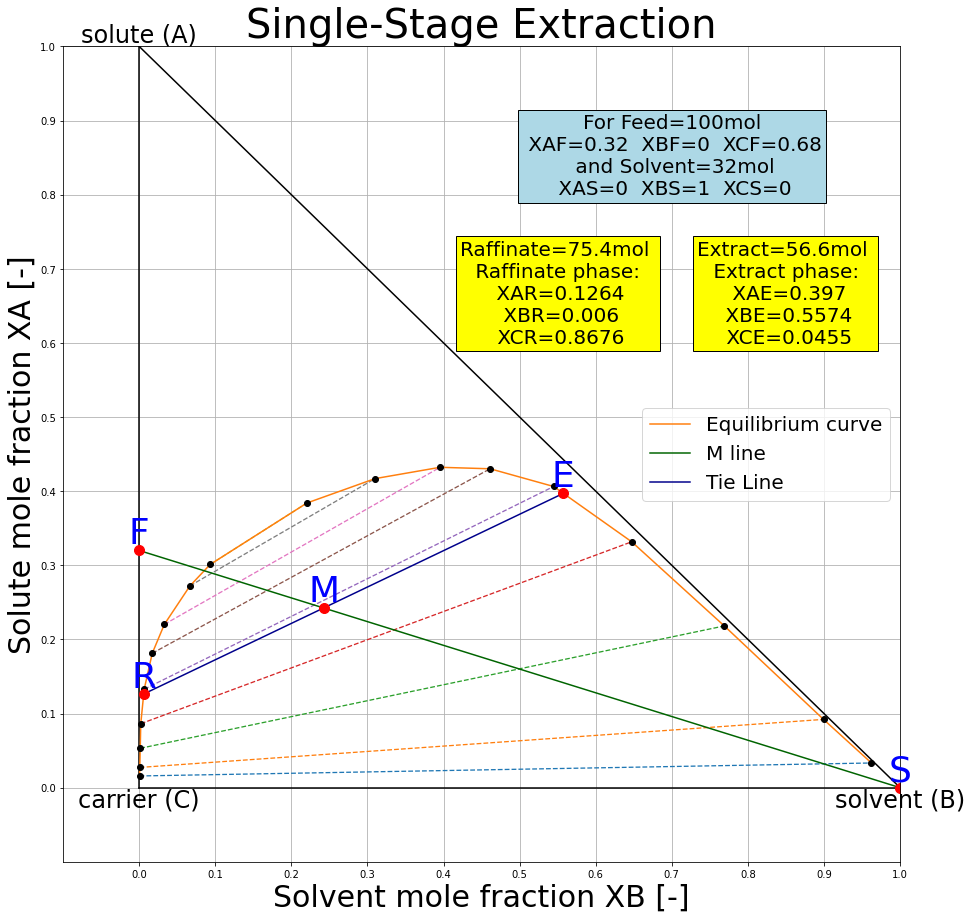

In [5]:
import numpy as np
import matplotlib.pyplot as plt
### Equilibrium line
xy_equi=[(0.0005, 0.0158), (0.0008, 0.0273), (0.0014, 0.0531), (0.0021, 0.0863),
         (0.0066, 0.1328),(0.0172, 0.1813), (0.0331, 0.2203), (0.0668, 0.2723), 
         (0.0933, 0.3011), (0.9624, 0.0333), (0.8994, 0.0921), (0.769, 0.2182),
         (0.6473, 0.3317), (0.5447, 0.4063), (0.4612, 0.4302), (0.3955, 0.4322),
         (0.3099, 0.4169), (0.2204, 0.384)]

### intial flows and concentrations
F=100
XAF=0.32; XBF=0; XCF=0.68
S=32
XAS=0; XBS=1; XCS=0
#__________________________________________________________________________________________
### Defining matemathical functions
def Line_eq(x1,y1,x2,y2,pointx):
    
    m=(y2-y1)/(x2-x1)
    y=m*(pointx-x1)+y1 #対角線
    return y
def slope(x1,y1,x2,y2):
    m=(y2-y1)/(x2-x1)
    return m
def intercept(x1,y1,x2,y2):
    m=(y2-y1)/(x2-x1)
    b=-m*x1+y1
    return b
def Line_eq2(m,x1,y1,pointx):
    y=m*(pointx-x1)+y1 #対角線
    return y
## sorting equilibrium line
def takeFirst(elem):
    return elem[0]
# sort list with key
xy_equi.sort(key=takeFirst)
xy_equi = np.array(xy_equi)

plt.figure(figsize=(15,15))
#__________________________________________________________________________________________

### Finding concentrations in point M
M=F+S
XAM=(F*XAF+S*XAS)/M; XBM=(F*XBF+S*XBS)/M; XCM=1-XAM-XBM

### 対角線=Diagonal Line
x=np.linspace(0,1,101)
yd=1-x #対角線
### M Line
yM=Line_eq(XBS,XAS,XBF,XAF,x) #M Line

### ploting equilibrium lines
for i in range(int(len(xy_equi)/2)):
    xrange=np.linspace(xy_equi[i,0],xy_equi[-1-i,0],101)
    yrange=Line_eq(xy_equi[i,0],xy_equi[i,1],xy_equi[-1-i,0],xy_equi[-1-i,1],xrange)
    plt.plot(xrange,yrange,'--',linewidth=1.3)
    

### Finding highest line below point M
for i in range(int(len(xy_equi)/2)):
    if XAM<=Line_eq(xy_equi[i,0],xy_equi[i,1],xy_equi[-1-i,0],xy_equi[-1-i,1],XBM):
        break
aboveM=xy_equi[i-1,0]
### Finding the equilibrium points enclosed by M.
##lb:left below, la:left above, rb:right below, ra: right above
x_lb=xy_equi[i-1,0]; y_lb=xy_equi[i-1,1]; x_la=xy_equi[i,0]; y_la=xy_equi[i,1]
x_rb=xy_equi[-i,0]; y_rb=xy_equi[-i,1]; x_ra=xy_equi[-1-i,0]; y_ra=xy_equi[-1-i,1]

##Calculating time line slope 
m_below=slope(x_lb,y_lb,x_rb,y_rb)
b=Line_eq(x_lb,y_lb,x_rb,y_rb,XBM)
m_above=slope(x_la,y_la,x_ra,y_ra)
a=Line_eq(x_la,y_la,x_ra,y_ra,XBM)

m_timeline=m_below*(a-XAM)/(a-b)+m_above*(XAM-b)/(a-b)

#Finding intersection points Extract(xi_r,yi_r) and Raffinate(xi_l,yi_l)
b_timeline=-m_timeline*XBM+XAM

m_right=slope(x_rb,y_rb,x_ra,y_ra)
b_right=intercept(x_rb,y_rb,x_ra,y_ra)
xi_r=-(b_right-b_timeline)/(m_right-m_timeline)
yi_r=Line_eq2(m_timeline,XBM,XAM,xi_r)


m_left=slope(x_lb,y_lb,x_la,y_la)
b_left=intercept(x_lb,y_lb,x_la,y_la)
xi_l=-(b_left-b_timeline)/(m_left-m_timeline)
yi_l=Line_eq2(m_timeline,XBM,XAM,xi_l)

##Tie line equation and plot
xi_range=np.linspace(xi_l,xi_r,101)
y_timeline=Line_eq2(m_timeline,XBM,XAM,xi_range)

#Finding Extractand Raffinate
XBE=xi_r; XAE=yi_r
XBR=xi_l; XAR=yi_l
E=M*(XAR-XAM)/(XAR-XAE)
R=M-E
print("Extract= ",E,"XAE= ",XAE,"XBE= ",XBE)
print("Raffinate= ",R,"XAR= ",XAR,"XBR= ",XBR)

##Plotting
plt.grid()
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.axis([-0.1, 1, -0.1, 1])
plt.plot(-1,0.5,'ro')
plt.axvline(0,ymin=1/11,color='k')
plt.axhline(0,xmin=1/11,color='k')
plt.title('Single-Stage Extraction', fontsize=40)
plt.xlabel('Solvent mole fraction XB [-]', fontsize=30)
plt.ylabel('Solute mole fraction XA [-]', fontsize=30)


plt.plot(x,yd,color='k') #対角線
plt.text(0,1,'solute (A)',color='k',fontsize=24,ha='center',va='bottom')
plt.text(1,0,'solvent (B)',color='k',fontsize=24,ha='center',va='top')
plt.text(0,0,'carrier (C)',color='k',fontsize=24,ha='center',va='top')
plt.plot(xy_equi[:,0],xy_equi[:,1],color='tab:orange',label='Equilibrium curve')
plt.plot(xy_equi[:,0],xy_equi[:,1],'o',color='k',)#Equilibrium points
plt.plot(x,yM,label='M line', color='darkgreen') #M line
plt.plot(xi_range,y_timeline,label='Tie Line', color='darkblue') #tie line
plt.legend(loc=7,fontsize=20)


plt.plot(XBF,XAF,'ro',markersize=10)
plt.text(XBF,XAF,'F',color='b',fontsize=36,ha='center',va='bottom')
plt.plot(XBS,XAS,'ro',markersize=10)
plt.text(XBS,XAS,'S',color='b',fontsize=36,ha='center',va='bottom')
plt.plot(XBM,XAM,'ro',markersize=10)
plt.text(XBM,XAM,'M',color='b',fontsize=36,ha='center',va='bottom')
plt.plot(xi_r,yi_r,'ro',markersize=10)
plt.text(xi_r,yi_r,'E',color='b',fontsize=36,ha='center',va='bottom')
plt.plot(xi_l,yi_l,'ro',markersize=10)
plt.text(xi_l,yi_l,'R',color='b',fontsize=36,ha='center',va='bottom')
plt.text(0.7,0.8,"For Feed=" +str(np.round(F,decimals=2))+"mol" 
         "\n XAF="+str(np.round(XAF,decimals=4))+
         "  XBF="+str(np.round(XBF,decimals=4))+
         "  XCF="+str(np.round(XCF,decimals=4))+
         "\n and Solvent=" +str(np.round(S,decimals=2))+"mol" 
         "\n XAS="+str(np.round(XAS,decimals=4))+
         "  XBS="+str(np.round(XBS,decimals=4))+
         "  XCS="+str(np.round(XCS,decimals=4)), bbox={"fc":"lightblue"}, fontsize=20,
         ha='center')
plt.text(0.85,0.6,"Extract=" +str(np.round(E,decimals=2))+"mol"
         " \n Extract phase:"
         " \n XAE="+str(np.round(XAE,decimals=4))+
         "\n XBE="+str(np.round(XBE,decimals=4))+
         "\n XCE="+str(np.round(1-XAE-XBE,decimals=4)), bbox={"fc":"yellow"}, fontsize=20,
         ha='center')
plt.text(0.55,0.6,"Raffinate=" +str(np.round(R,decimals=2))+"mol"
         " \n Raffinate phase: "
         "\n XAR="+str(np.round(XAR,decimals=4))+
         "\n XBR="+str(np.round(XBR,decimals=4))+
         "\n XCR="+str(np.round(1-XAR-XBR,decimals=4)), bbox={"fc":"yellow"}, fontsize=20,
         ha='center')
plt.show()

Extract1= 56.596275225592635 mol  XAE1= 0.3970345586886078 XBE1= 0.5574430868438182
Raffinate1= 75.40372477440737 mol  XAR1= 0.12637734900892017 XBR1= 0.005978453129895502
Extract2= 39.47633081597471 mol  XAE2= 0.16882374998718389 XBE2= 0.8200599762226108
Raffinate2= 67.92739395843265 mol  XAR2= 0.042174157896495035 XBR2= 0.0011459106487556985


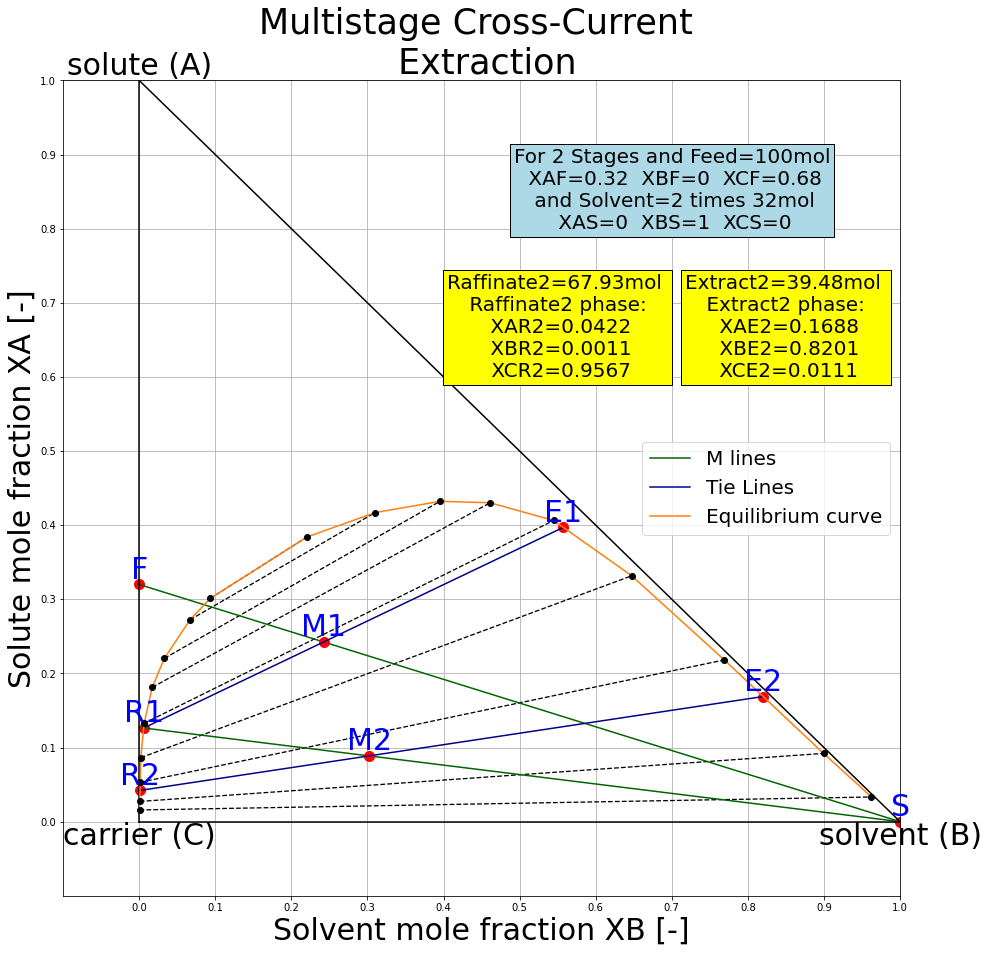

In [15]:
import numpy as np
import matplotlib.pyplot as plt
### Equilibrium line
xy_equi=[(0.0005, 0.0158), (0.0008, 0.0273), (0.0014, 0.0531), (0.0021, 0.0863),
         (0.0066, 0.1328),(0.0172, 0.1813), (0.0331, 0.2203), (0.0668, 0.2723), 
         (0.0933, 0.3011), (0.9624, 0.0333), (0.8994, 0.0921), (0.769, 0.2182),
         (0.6473, 0.3317), (0.5447, 0.4063), (0.4612, 0.4302), (0.3955, 0.4322),
         (0.3099, 0.4169), (0.2204, 0.384)]

### intial flows and concentrations
F=100
XAF=0.32; XBF=0; XCF=0.68
S=32
XAS=0; XBS=1; XCS=0
stages=2
#__________________________________________________________________________________________
### Defining matemathical functions
def Line_eq(x1,y1,x2,y2,pointx):
    m=(y2-y1)/(x2-x1)
    y=m*(pointx-x1)+y1 #対角線
    return y

def slope(x1,y1,x2,y2):
    m=(y2-y1)/(x2-x1)
    return m

def intercept(x1,y1,x2,y2):
    m=(y2-y1)/(x2-x1)
    b=-m*x1+y1
    return b

def Line_eq2(m,x1,y1,pointx):
    y=m*(pointx-x1)+y1 #対角線
    return y

## sorting equilibrium line
def takeFirst(elem):
    return elem[0]
# sort list with key
xy_equi.sort(key=takeFirst)
xy_equi = np.array(xy_equi)

plt.figure(figsize=(15,15))
#__________________________________________________________________________________________
## Starting points
plt.plot(XBF,XAF,'ro',markersize=10)
plt.text(XBF,XAF,'F',color='b',fontsize=30,ha='center',va='bottom')
plt.plot(XBS,XAS,'ro',markersize=10)
plt.text(XBS,XAS,'S',color='b',fontsize=30,ha='center',va='bottom')

F0=F; XAF0=XAF; XBF0=XBF; XCF0=XCF

S0=S; XAS0=XAS; XBS0=XBS; XCS0=XCS

### 対角線=Diagonal Line
x=np.linspace(0,1,101)
yd=1-x #対角線

### ploting equilibrium lines

for i in range(int(len(xy_equi)/2)):
    xrange=np.linspace(xy_equi[i,0],xy_equi[-1-i,0],101)
    yrange=Line_eq(xy_equi[i,0],xy_equi[i,1],xy_equi[-1-i,0],xy_equi[-1-i,1],xrange)
    plt.plot(xrange,yrange,'--',color='k',linewidth=1.3)
    
##Creating a loop function to process all the stages   
for j in range(stages):
    ### Finding concentrations in point M
    M=F+S
    XAM=(F*XAF+S*XAS)/M; XBM=(F*XBF+S*XBS)/M; XCM=1-XAM-XBM  
    plt.text(XBM,XAM,'M'+str(j+1),color='b',fontsize=30,ha='center',va='bottom')
    yM=Line_eq(XBS,XAS,XBF,XAF,x) #M Line
    
    ## This loop is for labeling just important lines
    Label1='_'; Label2='_'
    if j==0:
        Label1='M lines'
        Label2='Tie Lines'
    
    ### M Line
    plt.plot(x,yM,label=Label1, color='darkgreen') #M line
    plt.plot(XBM,XAM,'ro',markersize=10)

    
    ### Finding highest line below point M
    for i in range(int(len(xy_equi)/2)):
        if XAM<=Line_eq(xy_equi[i,0],xy_equi[i,1],xy_equi[-1-i,0],xy_equi[-1-i,1],XBM):
            break
            
    ### Finding the equilibrium points enclosed by M.
    
    ##lb:left below, la:left above, rb:right below, ra: right above
    x_lb=xy_equi[i-1,0]; y_lb=xy_equi[i-1,1]; x_la=xy_equi[i,0]; y_la=xy_equi[i,1]
    x_rb=xy_equi[-i,0]; y_rb=xy_equi[-i,1]; x_ra=xy_equi[-1-i,0]; y_ra=xy_equi[-1-i,1]

    ##Calculating tie line slope 
    m_below=slope(x_lb,y_lb,x_rb,y_rb)
    b=Line_eq(x_lb,y_lb,x_rb,y_rb,XBM)
    m_above=slope(x_la,y_la,x_ra,y_ra)
    a=Line_eq(x_la,y_la,x_ra,y_ra,XBM)

    m_timeline=m_below*(a-XAM)/(a-b)+m_above*(XAM-b)/(a-b)

    #Finding intersection points Extract(xi_r,yi_r) and Raffinate(xi_l,yi_l)
    b_timeline=-m_timeline*XBM+XAM

    m_right=slope(x_rb,y_rb,x_ra,y_ra)
    b_right=intercept(x_rb,y_rb,x_ra,y_ra)
    xi_r=-(b_right-b_timeline)/(m_right-m_timeline)
    yi_r=Line_eq2(m_timeline,XBM,XAM,xi_r)
    plt.plot(xi_r,yi_r,'ro',markersize=10)
    plt.text(xi_r,yi_r,'E'+str(j+1),color='b',fontsize=30,ha='center',va='bottom')

    m_left=slope(x_lb,y_lb,x_la,y_la)
    b_left=intercept(x_lb,y_lb,x_la,y_la)
    xi_l=-(b_left-b_timeline)/(m_left-m_timeline)
    yi_l=Line_eq2(m_timeline,XBM,XAM,xi_l)
    plt.plot(xi_l,yi_l,'ro',markersize=10)
    plt.text(xi_l,yi_l,'R'+str(j+1),color='b',fontsize=30,ha='center',va='bottom')

    ##Tie line equation and plot
    xi_range=np.linspace(xi_l,xi_r,101)
    y_timeline=Line_eq2(m_timeline,XBM,XAM,xi_range)
    plt.plot(xi_range,y_timeline,label=Label2, color='darkblue') #tie line

    #Finding Extract and Raffinate
    XBE=xi_r; XAE=yi_r
    XBR=xi_l; XAR=yi_l
    E=M*(XAR-XAM)/(XAR-XAE)
    R=M-E
    print("Extract"+str(j+1)+"=",E,"mol ","XAE"+str(j+1)+"=",XAE,"XBE"+str(j+1)+"=",XBE)
    print("Raffinate"+str(j+1)+"=",R,"mol ","XAR"+str(j+1)+"=",XAR,"XBR"+str(j+1)+"=",XBR)
    
    ##Replacing obatained Raffinate with new Feed for the next step of the loop
    XBF=XBR; XAF=XAR
    F=R
    
##Plotting basic information of the 
plt.grid()
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.axis([-0.1, 1, -0.1, 1])
plt.plot(-1,0.5,'ro')
plt.axvline(0,ymin=1/11,color='k')
plt.axhline(0,xmin=1/11,color='k')
plt.title('Multistage Cross-Current \n Extraction', fontsize=35)
plt.xlabel('Solvent mole fraction XB [-]', fontsize=30)
plt.ylabel('Solute mole fraction XA [-]', fontsize=30)
plt.plot(x,yd,color='k') #対角線
plt.text(0,1,'solute (A)',color='k',fontsize=30,ha='center',va='bottom')
plt.text(1,0,'solvent (B)',color='k',fontsize=30,ha='center',va='top')
plt.text(0,0,'carrier (C)',color='k',fontsize=30,ha='center',va='top')
plt.plot(xy_equi[:,0],xy_equi[:,1],color='tab:orange',label='Equilibrium curve')
plt.plot(xy_equi[:,0],xy_equi[:,1],'o',color='k',)#Equilibrium points
plt.legend(loc=7,fontsize=20)

## Results written in the boxes
plt.text(0.7,0.8,"For "+str(stages)+" Stages and Feed=" +str(np.round(F0,decimals=2))+"mol" 
         "\n XAF="+str(np.round(XAF0,decimals=4))+
         "  XBF="+str(np.round(XBF0,decimals=4))+
         "  XCF="+str(np.round(XCF0,decimals=4))+
         "\n and Solvent="+str(stages)+" times "+str(np.round(S0,decimals=2))+"mol" 
         "\n XAS="+str(np.round(XAS,decimals=4))+
         "  XBS="+str(np.round(XBS0,decimals=4))+
         "  XCS="+str(np.round(XCS0,decimals=4)), bbox={"fc":"lightblue"}, fontsize=20,
         ha='center')
plt.text(0.85,0.6,"Extract"+str(stages)+"=" +str(np.round(E,decimals=2))+"mol"
         " \n Extract"+str(stages)+" phase:"
         " \n XAE"+str(stages)+"="+str(np.round(XAE,decimals=4))+
         "\n XBE"+str(stages)+"="+str(np.round(XBE,decimals=4))+
         "\n XCE"+str(stages)+"="+str(np.round(1-XAE-XBE,decimals=4)), bbox={"fc":"yellow"}, fontsize=20,
         ha='center')
plt.text(0.55,0.6,"Raffinate"+str(stages)+"=" +str(np.round(R,decimals=2))+"mol"
         " \n Raffinate"+str(stages)+" phase: "
         "\n XAR"+str(stages)+"="+str(np.round(XAR,decimals=4))+
         "\n XBR"+str(stages)+"="+str(np.round(XBR,decimals=4))+
         "\n XCR"+str(stages)+"="+str(np.round(1-XAR-XBR,decimals=4)), bbox={"fc":"yellow"}, fontsize=20,
         ha='center')
plt.show()

In [4]:
for m in range(5):
    print(m)
    for j in range(3):
        print(j)

0
0
1
2
1
0
1
2
2
0
1
2
3
0
1
2
4
0
1
2
